<a href="https://colab.research.google.com/github/ELIJAHKUNGU/Machine-Learning-/blob/master/Business_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly_express
!pip install imblearn
!pip install bubbly
!pip install joypy

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5433 sha256=689c9dcb6a15986ad4a3094e66a85bcd58b06853a99ada3ad0db94a37eb2f831
  Stored in directory: /root/.cache/pip/wheels/85/c7/3d/38784ece9ac882d3afdb852ea8cf867df942fe6c71da5c4360
Successfully built bubbly


In [ ]:
# for visualizations
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 
import joypy


import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

# for providing path
import os
#print(os.listdir("../insurance_claims.csv"))

# for modelling
import sklearn

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

dataset=pd.read_excel("/content/Web_Analytics_Data (2).xlsx")

dataset.head()


Mounted at /content/drive


,DAY,VISITS,ORDERS,HAS_PURCHASED_PRIOR,DEVICE,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,GENDER,AGE,INCOME,
0,2013-01-01,64340,2312,N,iPhone,21755,21501,41587,45582,F,24,451529,NaN
1,2013-01-02,63958,2427,N,iPhone,15675,21355,41392,45456,F,22,384768,NaN
2,2013-01-03,67390,2230,Y,iPhone,28199,17086,46559,51972,M,71,283793,NaN
3,2013-01-04,58305,1814,N,iPhone,24380,17172,35612,41043,M,51,417355,NaN
4,2013-01-05,74434,2333,Y,iPhone,15518,19392,44692,55954,F,32,99205,NaN


,DAY,VISITS,ORDERS,HAS_PURCHASED_PRIOR,DEVICE,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,GENDER,AGE,INCOME,
0,2013-01-01,64340,2312,N,iPhone,21755,21501,41587,45582,F,24,451529,NaN
1,2013-01-02,63958,2427,N,iPhone,15675,21355,41392,45456,F,22,384768,NaN
2,2013-01-03,67390,2230,Y,iPhone,28199,17086,46559,51972,M,71,283793,NaN
3,2013-01-04,58305,1814,N,iPhone,24380,17172,35612,41043,M,51,417355,NaN
4,2013-01-05,74434,2333,Y,iPhone,15518,19392,44692,55954,F,32,99205,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2013-12-27,25223,826,N,Other,5947,7931,17260,18307,F,45,256832,NaN
5106,2013-12-28,12342,486,Y,Other,3340,3430,7760,9869,F,67,232367,NaN
5107,2013-12-29,30457,1181,N,Other,11623,7981,19247,23140,F,72,24432,NaN
5108,2013-12-30,32452,1284,N,Other,7214,9417,22459,25545,M,29,484584,NaN


In [ ]:
dataset.columns

Index(['DAY', 'VISITS', 'ORDERS', 'HAS_PURCHASED_PRIOR', 'DEVICE', 'BOUNCES',
       'ADD_TO_CART', 'PRODUCT_PAGE_VIEWS', 'SEARCH_PAGE_VIEWS', 'GENDER',
       'AGE', 'INCOME', ' '],
      dtype='object')

In [ ]:
dataset.shape

(5110, 13)

In [ ]:
dataset.sum().isnull()


VISITS                 False
ORDERS                 False
HAS_PURCHASED_PRIOR    False
DEVICE                 False
BOUNCES                False
ADD_TO_CART            False
PRODUCT_PAGE_VIEWS     False
SEARCH_PAGE_VIEWS      False
GENDER                 False
AGE                    False
INCOME                 False
                       False
dtype: bool

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DAY                  5110 non-null   datetime64[ns]
 1   VISITS               5110 non-null   int64         
 2   ORDERS               5110 non-null   int64         
 3   HAS_PURCHASED_PRIOR  5110 non-null   object        
 4   DEVICE               5110 non-null   object        
 5   BOUNCES              5110 non-null   int64         
 6   ADD_TO_CART          5110 non-null   int64         
 7   PRODUCT_PAGE_VIEWS   5110 non-null   int64         
 8   SEARCH_PAGE_VIEWS    5110 non-null   int64         
 9   GENDER               5110 non-null   object        
 10  AGE                  5110 non-null   int64         
 11  INCOME               5110 non-null   int64         
 12                       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1),

In [ ]:
dataset.describe()

,VISITS,ORDERS,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,AGE,INCOME,
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,0.0
mean,183480.110959,6410.258904,60133.768689,54968.698239,119285.097260,137587.489237,48.517417,258453.877886,NaN
std,250006.872086,8775.732587,85182.114110,75401.482153,162983.051841,187651.313442,18.147166,139310.205224,NaN
min,1518.000000,46.000000,343.000000,394.000000,941.000000,1068.000000,18.000000,15049.000000,NaN
25%,22844.000000,799.000000,7101.500000,6775.500000,14765.000000,17177.750000,33.000000,138866.000000,NaN
50%,60452.500000,2095.500000,19077.500000,18086.000000,39293.000000,45558.000000,48.000000,260371.500000,NaN
75%,284524.250000,9646.750000,77862.500000,82423.750000,183667.500000,214094.750000,64.000000,379528.750000,NaN
max,824880.000000,32895.000000,369338.000000,284697.000000,575068.000000,655291.000000,80.000000,499838.000000,NaN


In [ ]:
dataset = dataset[dataset.columns[:-1]]

In [ ]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

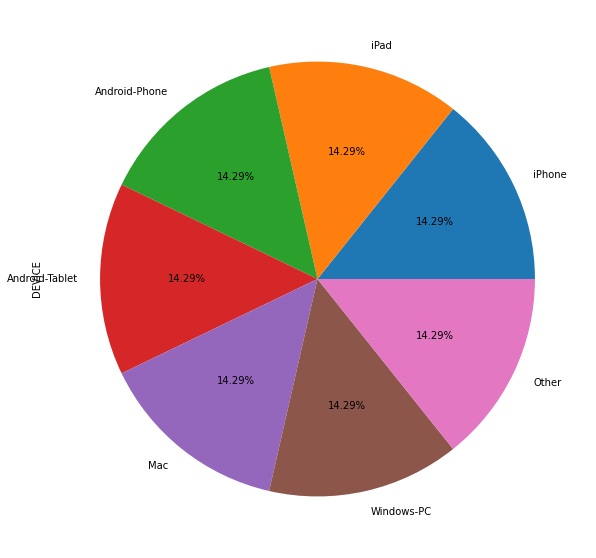

In [ ]:
#Univariate  Visualizations


#visualizing species
plt.figure(figsize=(20,10))
dataset["DEVICE"].value_counts().plot(kind='pie',autopct="%1.2f%%")

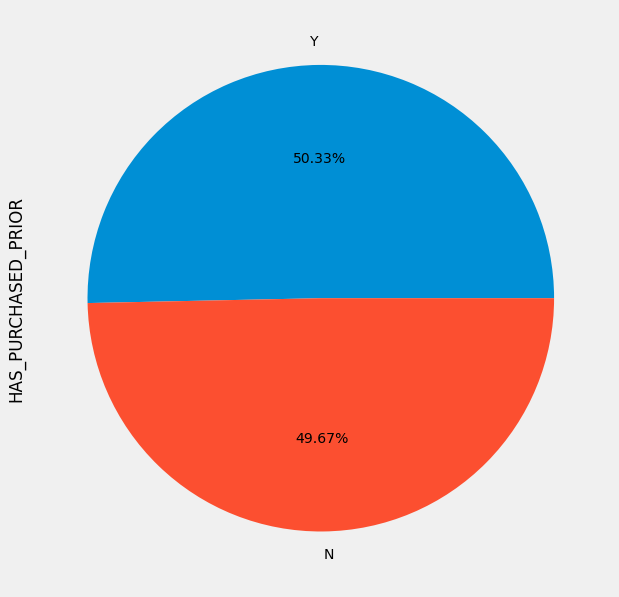

In [ ]:
#Univariate  Visualizations


#visualizing species
plt.figure(figsize=(20,10))
dataset["HAS_PURCHASED_PRIOR"].value_counts().plot(kind='pie',autopct="%1.2f%%")

In [ ]:
dataset.corr()

,VISITS,ORDERS,BOUNCES,ADD_TO_CART,PRODUCT_PAGE_VIEWS,SEARCH_PAGE_VIEWS,AGE,INCOME
VISITS,1.000000,0.994512,0.963703,0.992727,0.998468,0.998806,-0.002434,-0.017961
ORDERS,0.994512,1.000000,0.958971,0.987160,0.993310,0.993354,-0.000326,-0.017586
BOUNCES,0.963703,0.958971,1.000000,0.958139,0.961955,0.962697,0.000849,-0.015999
ADD_TO_CART,0.992727,0.987160,0.958139,1.000000,0.991348,0.991806,-0.006246,-0.019597
PRODUCT_PAGE_VIEWS,0.998468,0.993310,0.961955,0.991348,1.000000,0.997271,-0.002431,-0.018336
SEARCH_PAGE_VIEWS,0.998806,0.993354,0.962697,0.991806,0.997271,1.000000,-0.003133,-0.016690
AGE,-0.002434,-0.000326,0.000849,-0.006246,-0.002431,-0.003133,1.000000,-0.015565
INCOME,-0.017961,-0.017586,-0.015999,-0.019597,-0.018336,-0.016690,-0.015565,1.000000


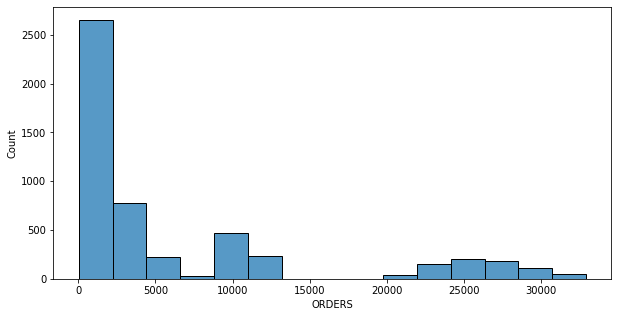

In [ ]:
#Data Visualizations
# plotting a scatter plot



plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x= 'ORDERS', bins=15)
plt.show()

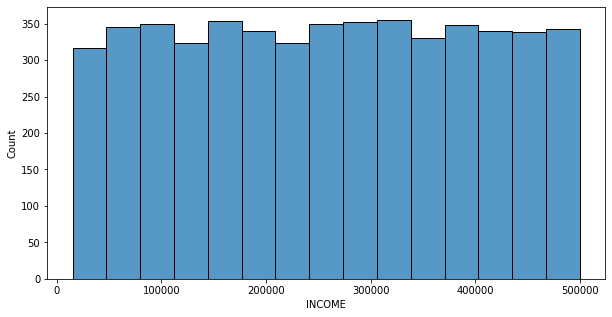

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x= 'INCOME', bins=15)
plt.show()

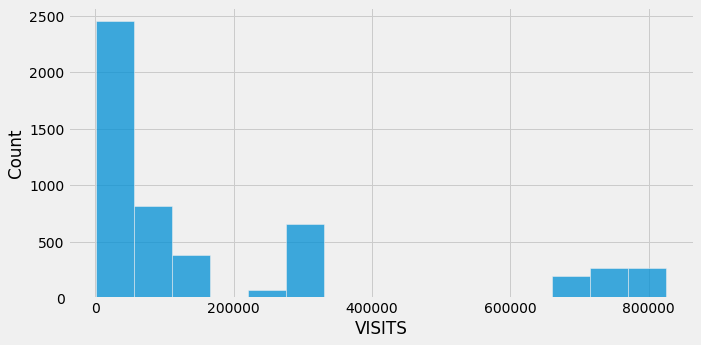

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=dataset, x= 'VISITS', bins=15)
plt.show()

In [ ]:
dataset.columns

Index(['DAY', 'VISITS', 'ORDERS', 'HAS_PURCHASED_PRIOR', 'DEVICE', 'BOUNCES',
       'ADD_TO_CART', 'PRODUCT_PAGE_VIEWS', 'SEARCH_PAGE_VIEWS', 'GENDER',
       'AGE', 'INCOME'],
      dtype='object')

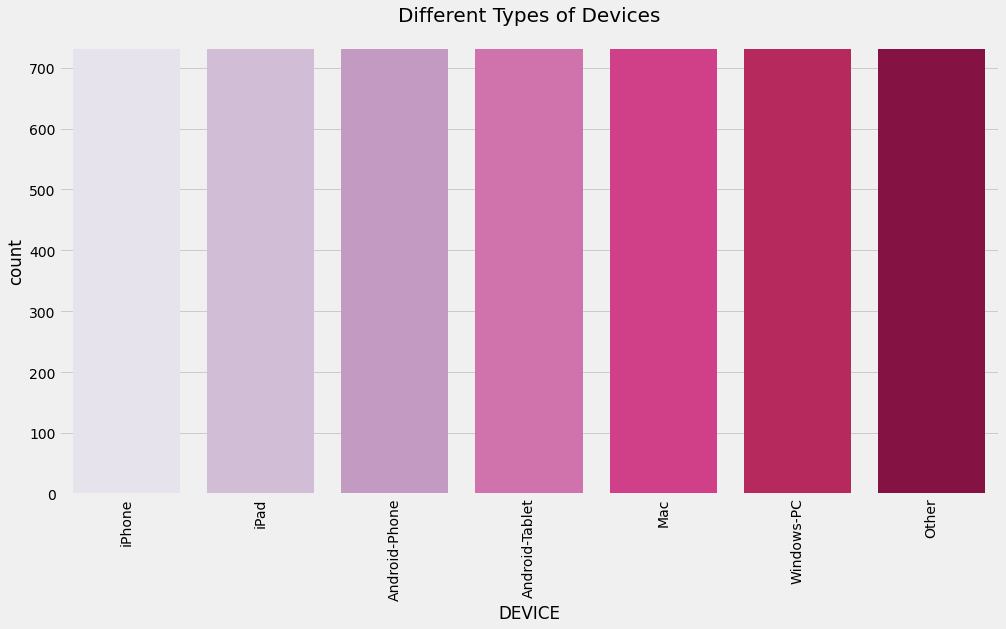

In [ ]:
# let's check the Devices

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(dataset['DEVICE'], palette = 'PuRd')
plt.title('Different Types of Devices', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

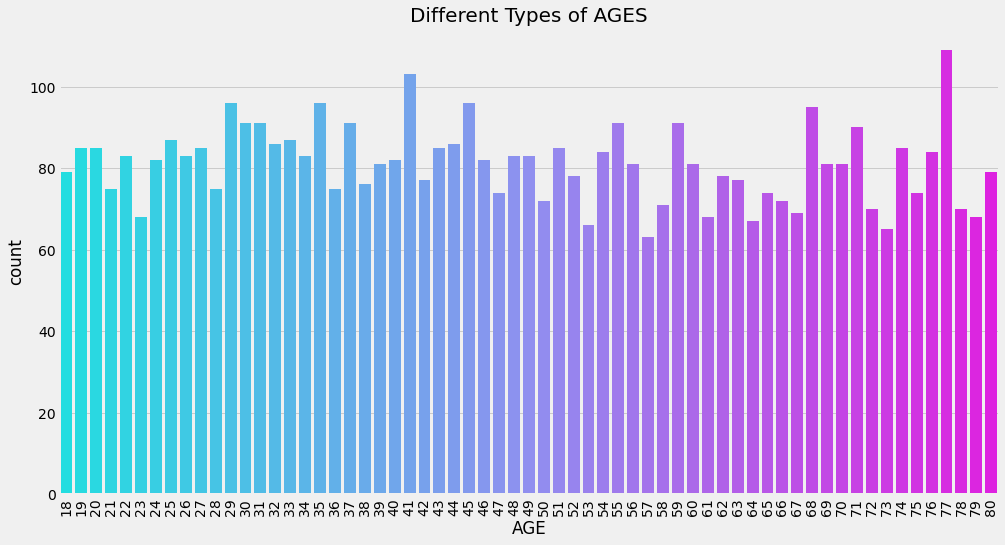

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(dataset['AGE'], palette = 'cool')
plt.title('Different Types of AGES', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

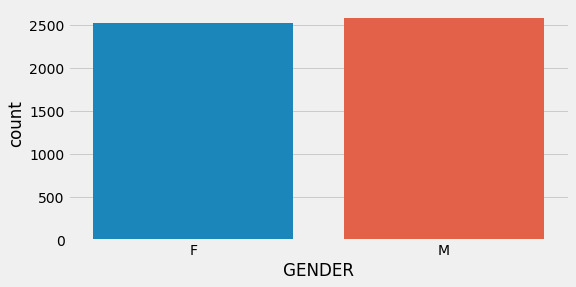

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='GENDER', data=dataset)
plt.show()

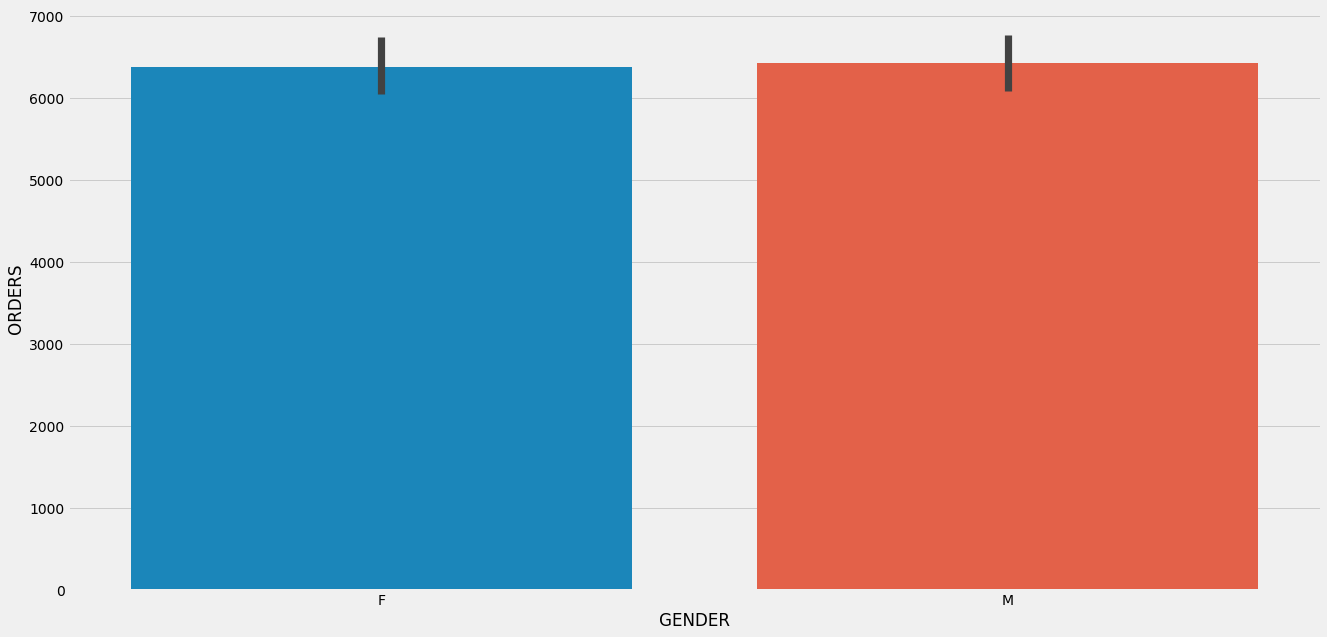

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='ORDERS',x='GENDER', data=dataset)

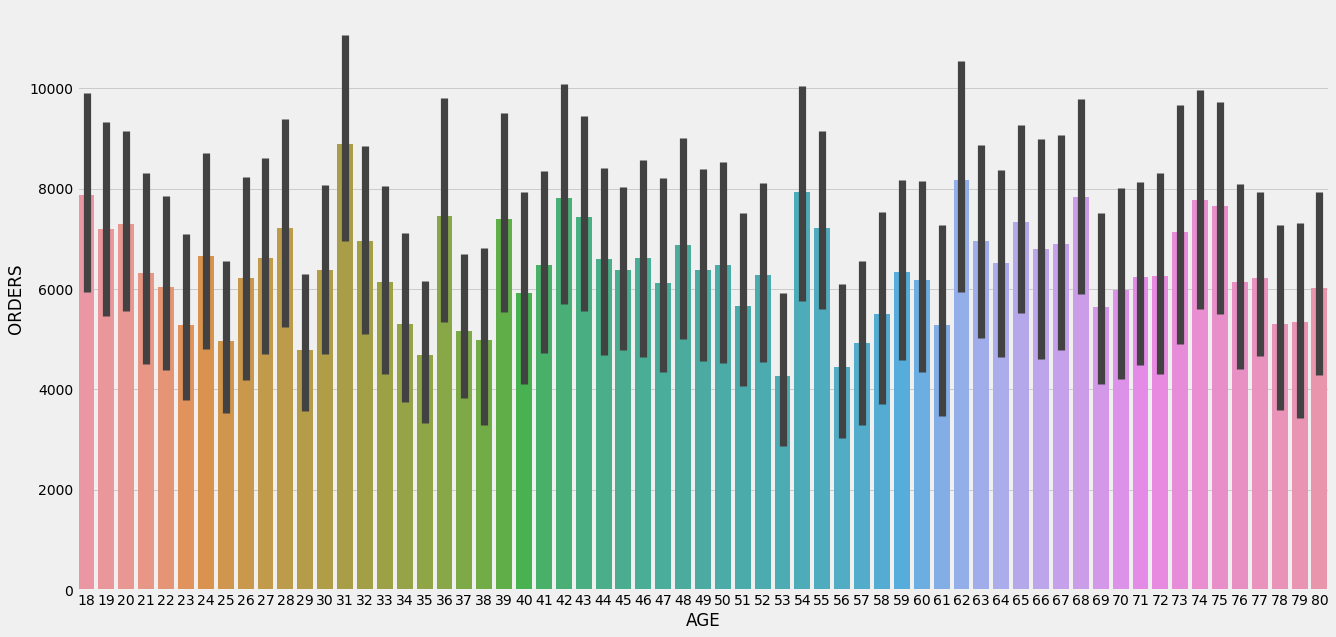

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='ORDERS',x='AGE', data=dataset)

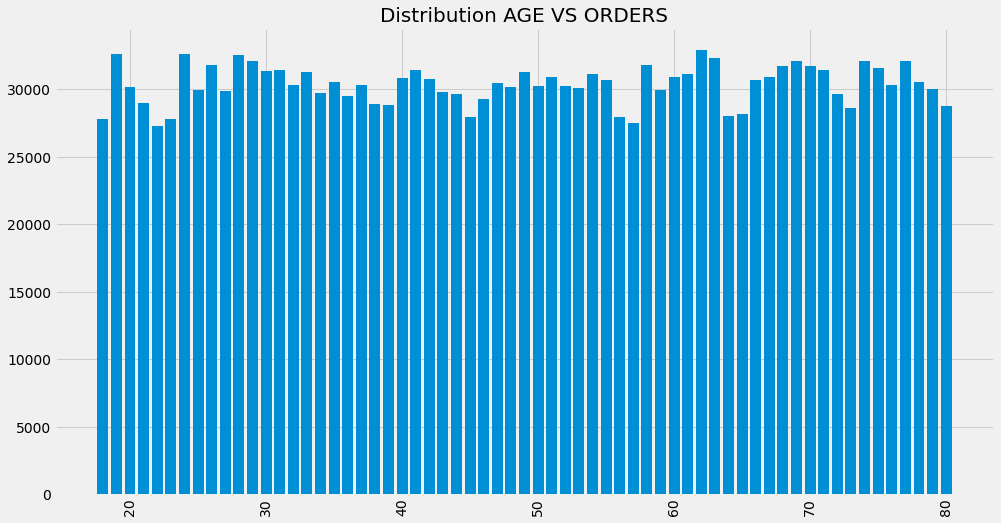

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

plt.bar(dataset['AGE'], dataset['ORDERS'])
plt.title('Distribution AGE VS ORDERS', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

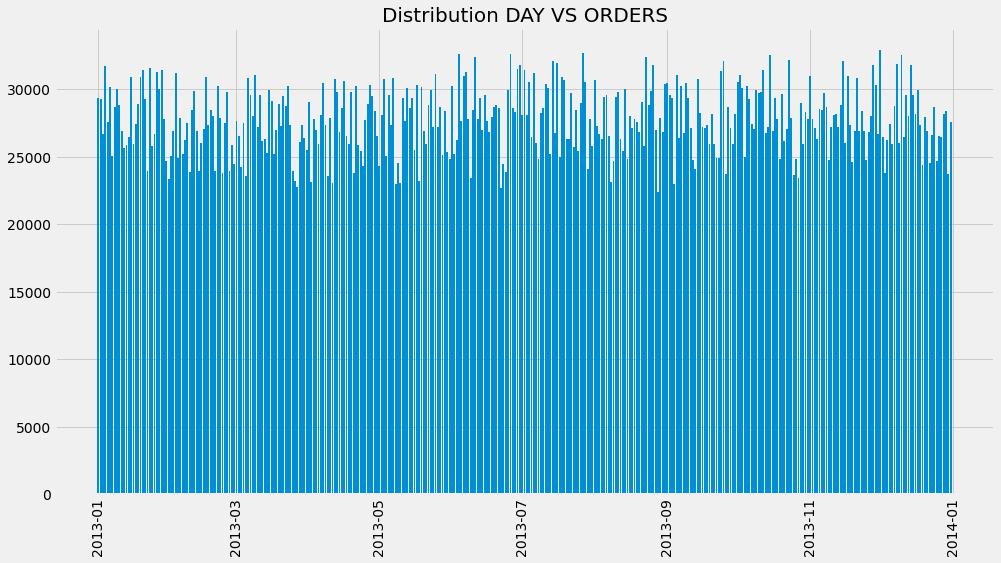

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

plt.bar(dataset['DAY'], dataset['ORDERS'])
plt.title('Distribution DAY VS ORDERS', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 

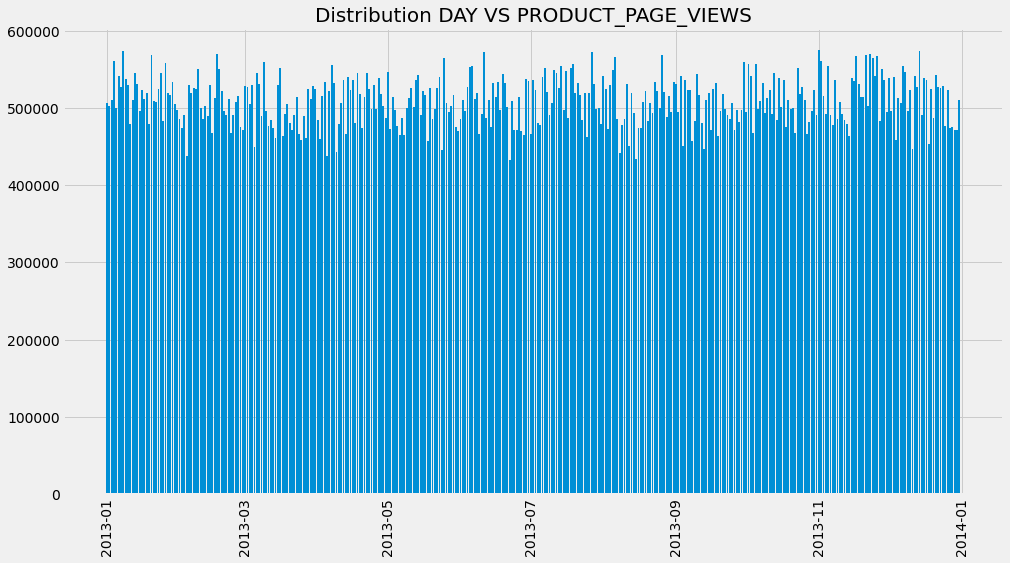

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

plt.bar(dataset['DAY'], dataset['PRODUCT_PAGE_VIEWS'])
plt.title('Distribution DAY VS PRODUCT_PAGE_VIEWS', fontsize = 20)
plt.xticks(rotation = 90)
plt.show() 